In [1]:
# I start with some useful libraries

import os
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator

In [2]:
#this are the rmsm files you want to check

path_dir: str = r"/home/svergani/monitoring/hdf5_created_files"
target_0 = h5.File(os.sep.join([path_dir, "rmsm_display_0_2022_05_22.hdf5"]), 'r')
target_1 = h5.File(os.sep.join([path_dir, "rmsm_display_1_2022_05_22.hdf5"]), 'r')
target_2 = h5.File(os.sep.join([path_dir, "rmsm_display_2_2022_05_22.hdf5"]), 'r')

In [3]:
#this is the file containing the baselines

baselines = h5.File(os.sep.join([path_dir, "baselines_2022_05_22.hdf5"]), 'r')

In [4]:
#I extract data from files and baseline

rmsm_0 = np.array(target_0.get('rmsm').value)
rmsm_1 = np.array(target_1.get('rmsm').value)
rmsm_2 = np.array(target_2.get('rmsm').value)
bl_0_array = np.array(baselines.get('mean_display_0').value)
bl_1_array = np.array(baselines.get('mean_display_1').value)
bl_2_array = np.array(baselines.get('mean_display_2').value)
bl_0_total = baselines.get('total_mean_0').value
bl_1_total = baselines.get('total_mean_1').value
bl_2_total = baselines.get('total_mean_2').value

In [5]:
time_0 = np.arange(rmsm_0.shape[0])*10
time_1 = np.arange(rmsm_1.shape[0])*10
time_2 = np.arange(rmsm_2.shape[0])*10

In [6]:
#If a value in the rmsm for a given channel is more than 35% far from the average,
#which is roughly one sigma
# AND this happens in two subsequent pixels, then ring the bell
faulty_0 = []
channel_0_alarms = []

for i in range(rmsm_0.shape[1]):#channels
    temp_0 = []
    for j in range(rmsm_0.shape[0]):#measurements
        if((abs(rmsm_0[j][i]-bl_0_array[i])/bl_0_array[i])>0.35):
            temp_0.append(rmsm_0[j][i])
        else:
            temp_0.append(-999)
    channel_0_alarms.append(temp_0)

channel_0_alarms= np.array(channel_0_alarms)

del temp_0
    
for i in range(channel_0_alarms.shape[0]):#channels
    temp_0 = []
    for j in range(channel_0_alarms.shape[1]):#measurements
        if(j<(channel_0_alarms.shape[1]-1) and channel_0_alarms[i][j]!=-999 and channel_0_alarms[i][j+1]!=-999):
            percentage=round((channel_0_alarms[i][j]-bl_0_array[i])/bl_0_array[i],2)
            temp_0.append(1)
            print("alarm! In channel",i,"at time",time_0[j],"we had a value",percentage," away from mean and this happened in two subsequent pixels")
        else:
                temp_0.append(0.1)
    faulty_0.append(temp_0)
del temp_0
faulty_0 = np.array(faulty_0)

alarm! In channel 0 at time 360 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 370 we had a value 1.66  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 380 we had a value 3.93  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 600 we had a value 1.41  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 610 we had a value 1.21  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 620 we had a value 3.95  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 630 we had a value 2.21  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 740 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 750 we had a value -0.45  away from mean and this happened in two subsequent pixel

alarm! In channel 2 at time 4890 we had a value 3.3  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4900 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4910 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4940 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4950 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4980 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4990 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 5000 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 5010 we had a value -0.64  away from mean and this happened in two sub

alarm! In channel 4 at time 880 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 950 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 960 we had a value 0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1050 we had a value 4.98  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1120 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1130 we had a value 1.37  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1140 we had a value 4.98  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1150 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1160 we had a value -0.38  away from mean and this happened in two subsequen

alarm! In channel 5 at time 2370 we had a value 2.22  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2380 we had a value 1.38  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2390 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2430 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2440 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2600 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2650 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2680 we had a value 3.22  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 2800 we had a value -0.51  away from mean and this happened in two subs

alarm! In channel 6 at time 2220 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2230 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2240 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2250 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2260 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2270 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2280 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2290 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 2320 we had a value -0.47  away from mean and this happened in two sub

alarm! In channel 6 at time 5420 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5450 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5480 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5490 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5540 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5550 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5560 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5570 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 5580 we had a value -0.38  away from mean and this happened in two su

alarm! In channel 8 at time 3230 we had a value 0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 3240 we had a value 0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 3360 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 3530 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 3690 we had a value 0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 3700 we had a value 1.08  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 4010 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 4020 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 4030 we had a value 2.96  away from mean and this happened in two subsequ

alarm! In channel 13 at time 120 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 370 we had a value 2.08  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 430 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 550 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 700 we had a value 3.63  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 880 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 890 we had a value 3.64  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 900 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1050 we had a value 2.08  away from mean and this happened in two subse

alarm! In channel 14 at time 5490 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5550 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5560 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5590 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5600 we had a value 3.63  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5610 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5620 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5630 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 5640 we had a value -0.47  away from mean and this happened 

alarm! In channel 17 at time 2680 we had a value 3.01  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 2740 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 2800 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 2890 we had a value 3.02  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 2920 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3090 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3240 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3410 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3530 we had a value -0.47  away from mean and this happened i

alarm! In channel 21 at time 700 we had a value 5.09  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 780 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 820 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 830 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 840 we had a value 5.09  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 870 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 880 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 890 we had a value 3.21  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 900 we had a value -0.46  away from mean and this happened in two subs

alarm! In channel 22 at time 4250 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4300 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4310 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4470 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4540 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4580 we had a value 3.69  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4590 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4620 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4840 we had a value -0.47  away from mean and this happened i

alarm! In channel 25 at time 1880 we had a value 3.44  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1890 we had a value 2.71  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1930 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1940 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 2120 we had a value 2.72  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 2130 we had a value 0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 2140 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 2150 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 2340 we had a value -0.36  away from mean and this happened in 

alarm! In channel 27 at time 2720 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2730 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2740 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2750 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2800 we had a value 1.1  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2850 we had a value 4.15  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2890 we had a value 3.98  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2920 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 2950 we had a value -0.41  away from mean and this happened in 

alarm! In channel 29 at time 5320 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5350 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5420 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5560 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5590 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5620 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5630 we had a value 3.13  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5750 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5830 we had a value 3.02  away from mean and this happened i

alarm! In channel 32 at time 3700 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3730 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3740 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3770 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3820 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3850 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3860 we had a value 5.05  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3870 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 3880 we had a value -0.58  away from mean and this happened i

alarm! In channel 33 at time 4070 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4150 we had a value 2.7  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4200 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4250 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4260 we had a value 1.4  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4270 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4340 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4350 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4500 we had a value 2.7  away from mean and this happened in tw

alarm! In channel 34 at time 4530 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4540 we had a value 1.9  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4550 we had a value 6.87  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4560 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4590 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4810 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4870 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4880 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4910 we had a value -0.39  away from mean and this happened in

alarm! In channel 37 at time 1050 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1150 we had a value 4.17  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1160 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1200 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1230 we had a value 3.27  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1240 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1250 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1450 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1510 we had a value -0.37  away from mean and this happened in

alarm! In channel 39 at time 3530 we had a value 2.07  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3660 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3950 we had a value 2.21  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3980 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3990 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4000 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4010 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4050 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4080 we had a value -0.42  away from mean and this happened in

alarm! In channel 42 at time 3960 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4050 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4090 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4180 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4370 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4380 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4530 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4540 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 4550 we had a value -0.48  away from mean and this happened

alarm! In channel 44 at time 2550 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2560 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2570 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2740 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2770 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2780 we had a value 7.13  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2790 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2800 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 2810 we had a value 7.08  away from mean and this happened in

alarm! In channel 46 at time 2600 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2740 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2800 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2810 we had a value 6.6  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2820 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 3160 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 3190 we had a value -0.5  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 3270 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 3510 we had a value -0.5  away from mean and this happened in t

alarm! In channel 49 at time 1050 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1060 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1070 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1080 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1110 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1120 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1130 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1140 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 1150 we had a value -0.37  away from mean and this happened

alarm! In channel 50 at time 560 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 650 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 660 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 750 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 820 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 830 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 840 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 850 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 860 we had a value -0.44  away from mean and this happened in two s

alarm! In channel 51 at time 5350 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5360 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5410 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5420 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5640 we had a value 6.54  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5830 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5840 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5850 we had a value 6.91  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5860 we had a value -0.38  away from mean and this happened in

alarm! In channel 54 at time 3870 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 3950 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 3980 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4130 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4180 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4210 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4290 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4300 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4330 we had a value -0.42  away from mean and this happened 

alarm! In channel 56 at time 710 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 720 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 750 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 780 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 790 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 820 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 830 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 840 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 850 we had a value -0.41  away from mean and this happened in two s

alarm! In channel 58 at time 2080 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2220 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2260 we had a value 6.29  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2410 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2460 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2490 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2630 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2770 we had a value 6.31  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2780 we had a value 0.83  away from mean and this happened in

alarm! In channel 61 at time 70 we had a value 7.03  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 130 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 140 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 150 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 280 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 360 we had a value 3.78  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 450 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 540 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 550 we had a value -0.36  away from mean and this happened in two subse

alarm! In channel 63 at time 2940 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3040 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3220 we had a value 3.07  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3370 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3380 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3390 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3450 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3480 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3650 we had a value 6.02  away from mean and this happened i

alarm! In channel 66 at time 170 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 270 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 280 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 290 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 490 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 500 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 670 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 680 we had a value 6.19  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 810 we had a value 0.49  away from mean and this happened in two sub

alarm! In channel 68 at time 4070 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4080 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4140 we had a value 6.5  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4150 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4210 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4240 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4340 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4350 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 4360 we had a value -0.39  away from mean and this happened i

alarm! In channel 70 at time 2890 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2900 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2910 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2920 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2930 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2940 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2950 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2960 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 2990 we had a value 7.46  away from mean and this happened 

alarm! In channel 71 at time 2410 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2420 we had a value 5.52  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2430 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2740 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2770 we had a value 5.51  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2800 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2810 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2820 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 2940 we had a value -0.35  away from mean and this happened i

alarm! In channel 73 at time 3200 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3210 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3250 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3370 we had a value -0.5  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3380 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3390 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3450 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3480 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 3510 we had a value -0.42  away from mean and this happened 

alarm! In channel 74 at time 4770 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4780 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4840 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4850 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4890 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4900 we had a value -0.5  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4910 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4940 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 4980 we had a value -0.35  away from mean and this happened 

alarm! In channel 75 at time 3540 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3590 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3600 we had a value 8.72  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3610 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3650 we had a value 8.69  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3660 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3690 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3700 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 3710 we had a value -0.41  away from mean and this happened in 

alarm! In channel 76 at time 5700 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 76 at time 5830 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 76 at time 6000 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 1240 we had a value 1.91  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 1590 we had a value 1.35  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 2000 we had a value 1.94  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 2410 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 2960 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 1590 we had a value 0.45  away from mean and this happened in tw

In [7]:
channel_1_alarms = []
faulty_1 = []

for i in range(rmsm_1.shape[1]):#channels
    temp_1 = []
    for j in range(rmsm_1.shape[0]):#measurements
        if((abs(rmsm_1[j][i]-bl_1_array[i])/bl_1_array[i])>0.35):
            temp_1.append(rmsm_1[j][i])
        else:
            temp_1.append(-999)
    channel_1_alarms.append(temp_1)

channel_1_alarms= np.array(channel_1_alarms)

del temp_1
    
for i in range(channel_1_alarms.shape[0]):#channels
    temp_1 = []
    for j in range(channel_1_alarms.shape[1]):#measurements
        if(j<(channel_1_alarms.shape[1]-1) and channel_1_alarms[i][j]!=-999 and channel_1_alarms[i][j+1]!=-999):
            percentage=round((channel_1_alarms[i][j]-bl_1_array[i])/bl_1_array[i],2)
            temp_1.append(1)
            print("alarm! In channel",i,"at time",time_1[j],"we had a value",percentage," away from mean and this happened in two subsequent pixels")
        else:
                temp_1.append(0.1)
    faulty_1.append(temp_1)
del temp_1
faulty_1 = np.array(faulty_1)

alarm! In channel 0 at time 1920 we had a value 2.42  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 1930 we had a value 1.54  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2640 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2650 we had a value 0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 3340 we had a value 0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 3350 we had a value 0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 4970 we had a value 0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5900 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 810 we had a value 0.66  away from mean and this happened in two subsequen

alarm! In channel 17 at time 5350 we had a value 2.16  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 5350 we had a value 1.28  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 3980 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5350 we had a value 0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 3690 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 3790 we had a value 0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 3800 we had a value 2.48  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 3810 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 4210 we had a value 2.49  away from mean and this happened in two

alarm! In channel 36 at time 5130 we had a value 2.09  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 270 we had a value 2.06  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 510 we had a value 0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 710 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 790 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1250 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1260 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 1270 we had a value 2.36  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 2820 we had a value 2.06  away from mean and this happened in two s

alarm! In channel 59 at time 5460 we had a value 6.9  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5540 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5550 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5560 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5650 we had a value 6.89  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5660 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5730 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5740 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5780 we had a value -0.46  away from mean and this happened in 

In [8]:
channel_2_alarms = []
faulty_2 = []

for i in range(rmsm_2.shape[1]):#channels
    temp_2 = []
    for j in range(rmsm_2.shape[0]):#measurements
        if((abs(rmsm_2[j][i]-bl_2_array[i])/bl_2_array[i])>0.35):
            temp_2.append(rmsm_2[j][i])
        else:
            temp_2.append(-999)
    channel_2_alarms.append(temp_2)

channel_2_alarms= np.array(channel_2_alarms)

del temp_2
    
for i in range(channel_2_alarms.shape[0]):#channels
    temp_2 = []
    for j in range(channel_2_alarms.shape[1]):#measurements
        if(j<(channel_2_alarms.shape[1]-1) and channel_2_alarms[i][j]!=-999 and channel_2_alarms[i][j+1]!=-999):
            percentage=round((channel_2_alarms[i][j]-bl_2_array[i])/bl_2_array[i],2)
            temp_2.append(1)
            print("alarm! In channel",i,"at time",time_2[j],"we had a value",percentage," away from mean and this happened in two subsequent pixels")
        else:
                temp_2.append(0.1)
    faulty_2.append(temp_2)
del temp_2
faulty_2 = np.array(faulty_2)

alarm! In channel 0 at time 0 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 10 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 20 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 30 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 40 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 50 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 60 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 70 we had a value 3.5  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 80 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm

alarm! In channel 0 at time 2370 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2380 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2390 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2400 we had a value 3.04  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2430 we had a value 7.51  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2440 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2450 we had a value 3.04  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2460 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 2470 we had a value -0.55  away from mean and this happened in two subs

alarm! In channel 0 at time 5280 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5290 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5300 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5310 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5320 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5330 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5340 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5350 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 0 at time 5360 we had a value -0.71  away from mean and this happened in two s

alarm! In channel 1 at time 2040 we had a value 3.04  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2050 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2060 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2070 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2080 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2090 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2100 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2110 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 2120 we had a value -0.67  away from mean and this happened in two sub

alarm! In channel 1 at time 4910 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4920 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4930 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4940 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4950 we had a value 7.6  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4960 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4970 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4980 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 1 at time 4990 we had a value -0.73  away from mean and this happened in two subs

alarm! In channel 2 at time 1700 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1710 we had a value 2.32  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1720 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1730 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1740 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1770 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1780 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1790 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 1800 we had a value -0.69  away from mean and this happened in two sub

alarm! In channel 2 at time 4620 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4630 we had a value 7.83  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4640 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4650 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4660 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4670 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4680 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4690 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 2 at time 4700 we had a value -0.64  away from mean and this happened in two sub

alarm! In channel 3 at time 1370 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1380 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1390 we had a value 7.16  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1400 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1410 we had a value 2.68  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1420 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1430 we had a value 2.12  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1440 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 1450 we had a value -0.68  away from mean and this happened in two subs

alarm! In channel 3 at time 4330 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4340 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4350 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4360 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4370 we had a value 2.69  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4380 we had a value 2.67  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4390 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4400 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 3 at time 4410 we had a value -0.7  away from mean and this happened in two subs

alarm! In channel 4 at time 1100 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1110 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1120 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1130 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1140 we had a value 2.98  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1150 we had a value 7.73  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1160 we had a value 2.37  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1170 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 1180 we had a value -0.57  away from mean and this happened in two subs

alarm! In channel 4 at time 4020 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4030 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4040 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4050 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4060 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4070 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4080 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4090 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 4 at time 4100 we had a value -0.66  away from mean and this happened in two s

alarm! In channel 5 at time 810 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 820 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 830 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 840 we had a value 7.26  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 850 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 860 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 870 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 880 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 890 we had a value -0.56  away from mean and this happened in two subsequent pi

alarm! In channel 5 at time 3710 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3720 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3730 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3740 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3750 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3760 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3770 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3780 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 5 at time 3790 we had a value -0.61  away from mean and this happened in two sub

alarm! In channel 6 at time 450 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 460 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 470 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 480 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 490 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 500 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 510 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 520 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 530 we had a value -0.63  away from mean and this happened in two subsequent 

alarm! In channel 6 at time 3440 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3450 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3460 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3470 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3480 we had a value 2.7  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3490 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3500 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3510 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 6 at time 3520 we had a value -0.74  away from mean and this happened in two sub

alarm! In channel 7 at time 180 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 190 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 200 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 210 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 220 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 230 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 240 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 250 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 260 we had a value -0.7  away from mean and this happened in two subsequent 

alarm! In channel 7 at time 3030 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3040 we had a value 2.31  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3050 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3060 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3070 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3080 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3090 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3100 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 3110 we had a value -0.73  away from mean and this happened in two sub

alarm! In channel 7 at time 5890 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5900 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5910 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5920 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5930 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5940 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5950 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5960 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 7 at time 5970 we had a value -0.64  away from mean and this happened in two su

alarm! In channel 8 at time 2840 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2850 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2860 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2870 we had a value 3.17  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2880 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2890 we had a value 3.62  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2900 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2910 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 2920 we had a value -0.6  away from mean and this happened in two subse

alarm! In channel 8 at time 6040 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 6050 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 6060 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 6070 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 6080 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 6090 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 6100 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 8 at time 6110 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 0 we had a value -0.62  away from mean and this happened in two subse

alarm! In channel 9 at time 2780 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2790 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2800 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2810 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2820 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2830 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2840 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2850 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 2860 we had a value -0.63  away from mean and this happened in two sub

alarm! In channel 9 at time 5650 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5660 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5670 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5680 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5690 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5700 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5710 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5720 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 9 at time 5730 we had a value -0.63  away from mean and this happened in two su

alarm! In channel 10 at time 2410 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2420 we had a value 2.73  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2430 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2440 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2450 we had a value 3.12  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2460 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2470 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2480 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 2490 we had a value -0.66  away from mean and this happened in

alarm! In channel 10 at time 5280 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5290 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5300 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5310 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5320 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5330 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5340 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5350 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 5360 we had a value -0.68  away from mean and this happened

alarm! In channel 10 at time 6000 we had a value 3.1  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6010 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6020 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6030 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6040 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6050 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6060 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6070 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 10 at time 6080 we had a value -0.53  away from mean and this happened in

alarm! In channel 11 at time 2060 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2070 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2080 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2090 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2100 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2110 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2120 we had a value 7.94  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2130 we had a value 3.74  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 2140 we had a value -0.66  away from mean and this happened i

alarm! In channel 11 at time 4910 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4920 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4930 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4940 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4950 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4960 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4970 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4980 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 4990 we had a value -0.67  away from mean and this happened i

alarm! In channel 11 at time 5670 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5680 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5690 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5700 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5710 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5720 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5730 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5740 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 11 at time 5750 we had a value -0.58  away from mean and this happened

alarm! In channel 12 at time 1770 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1780 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1790 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1800 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1810 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1820 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1830 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1840 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 1850 we had a value -0.69  away from mean and this happened 

alarm! In channel 12 at time 4670 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4680 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4690 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4700 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4710 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4720 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4730 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4740 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 12 at time 4750 we had a value -0.67  away from mean and this happened

alarm! In channel 13 at time 1530 we had a value 3.0  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1540 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1550 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1560 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1570 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1580 we had a value 6.38  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1590 we had a value 3.02  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1600 we had a value 3.02  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 1610 we had a value -0.72  away from mean and this happened in t

alarm! In channel 13 at time 4600 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4610 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4620 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4630 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4640 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4650 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4660 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4670 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 13 at time 4680 we had a value -0.7  away from mean and this happened i

alarm! In channel 14 at time 1490 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1500 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1510 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1520 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1530 we had a value 1.73  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1540 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1550 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1560 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 1570 we had a value -0.74  away from mean and this happened 

alarm! In channel 14 at time 2230 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2240 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2250 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2260 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2270 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2280 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2290 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2300 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 2310 we had a value -0.75  away from mean and this happened 

alarm! In channel 14 at time 4390 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4400 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4410 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4420 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4430 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4440 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4450 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4460 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 14 at time 4470 we had a value -0.72  away from mean and this happened 

alarm! In channel 15 at time 1160 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1170 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1180 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1190 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1200 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1210 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1220 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1230 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1240 we had a value 2.56  away from mean and this happened i

alarm! In channel 15 at time 1880 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1890 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1900 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1910 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1920 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1930 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1940 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1950 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 1960 we had a value -0.6  away from mean and this happened 

alarm! In channel 15 at time 4040 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4050 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4060 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4070 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4080 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4090 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4100 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4110 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 15 at time 4120 we had a value -0.63  away from mean and this happened 

alarm! In channel 16 at time 840 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 850 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 860 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 870 we had a value 7.38  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 880 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 890 we had a value 5.41  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 900 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 910 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 920 we had a value -0.6  away from mean and this happened in two subseq

alarm! In channel 16 at time 3730 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3740 we had a value 2.77  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3750 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3760 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3770 we had a value 7.42  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3780 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3790 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3800 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 16 at time 3810 we had a value -0.62  away from mean and this happened in

alarm! In channel 17 at time 550 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 560 we had a value 1.9  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 570 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 580 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 590 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 600 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 610 we had a value 3.66  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 620 we had a value 7.36  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 630 we had a value -0.58  away from mean and this happened in two subseq

alarm! In channel 17 at time 3440 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3450 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3460 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3470 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3480 we had a value 3.66  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3490 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3500 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3510 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 3520 we had a value -0.65  away from mean and this happened in

alarm! In channel 17 at time 4160 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4170 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4180 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4190 we had a value 7.32  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4200 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4210 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4220 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4230 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 17 at time 4240 we had a value 3.62  away from mean and this happened i

alarm! In channel 18 at time 240 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 250 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 260 we had a value 6.77  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 270 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 280 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 290 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 300 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 310 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 320 we had a value -0.75  away from mean and this happened in two su

alarm! In channel 18 at time 3150 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3160 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3170 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3180 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3210 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3220 we had a value 2.77  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3230 we had a value 3.23  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3240 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3250 we had a value -0.64  away from mean and this happened i

alarm! In channel 18 at time 3910 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3920 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3930 we had a value 2.76  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3940 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3950 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3960 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3970 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3980 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 3990 we had a value -0.71  away from mean and this happened i

alarm! In channel 18 at time 6050 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 6060 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 6070 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 6080 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 6090 we had a value 3.21  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 6100 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 18 at time 6110 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 0 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 10 we had a value -0.64  away from mean and this happened in tw

alarm! In channel 19 at time 2830 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2840 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2850 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2860 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2870 we had a value 2.32  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2880 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2890 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2900 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 2910 we had a value 5.12  away from mean and this happened i

alarm! In channel 19 at time 5720 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5730 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5740 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5750 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5760 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5770 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5780 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5790 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 19 at time 5800 we had a value -0.63  away from mean and this happened

alarm! In channel 20 at time 2520 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2530 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2540 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2550 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2560 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2570 we had a value 8.41  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2580 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2590 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 2600 we had a value -0.67  away from mean and this happened i

alarm! In channel 20 at time 5370 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5380 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5390 we had a value 3.43  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5400 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5410 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5420 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5430 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5440 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 5450 we had a value -0.75  away from mean and this happened 

alarm! In channel 20 at time 6090 we had a value 3.8  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 6100 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 20 at time 6110 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 0 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 10 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 20 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 30 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 40 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 50 we had a value -0.79  away from mean and this happened in two subseque

alarm! In channel 21 at time 2190 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2200 we had a value -0.83  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2210 we had a value 6.92  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2220 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2230 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2240 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2250 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2260 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 2270 we had a value -0.78  away from mean and this happened 

alarm! In channel 21 at time 5080 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5090 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5100 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5110 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5120 we had a value 5.82  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5130 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5140 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5150 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5160 we had a value -0.82  away from mean and this happened 

alarm! In channel 21 at time 5800 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5810 we had a value 5.98  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5820 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5830 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5840 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5850 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5860 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5870 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 21 at time 5880 we had a value -0.75  away from mean and this happened i

alarm! In channel 22 at time 1880 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1890 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1900 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1910 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1920 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1930 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1940 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1950 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 1960 we had a value -0.74  away from mean and this happened i

alarm! In channel 22 at time 4800 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4810 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4820 we had a value 7.44  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4830 we had a value 2.72  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4840 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4850 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4860 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4870 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 22 at time 4880 we had a value -0.84  away from mean and this happened i

alarm! In channel 23 at time 1590 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1600 we had a value 1.62  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1610 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1620 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1630 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1640 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1650 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1660 we had a value 8.8  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 1670 we had a value -0.78  away from mean and this happened in

alarm! In channel 23 at time 4510 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4520 we had a value 1.72  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4530 we had a value 1.61  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4540 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4550 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4560 we had a value 3.14  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4570 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4580 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 23 at time 4590 we had a value -0.84  away from mean and this happened in t

alarm! In channel 24 at time 1300 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1310 we had a value 1.83  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1320 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1330 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1340 we had a value 1.85  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1350 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1360 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1370 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 1380 we had a value -0.75  away from mean and this happened in

alarm! In channel 24 at time 2040 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2050 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2060 we had a value -0.84  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2070 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2080 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2090 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2100 we had a value 1.81  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2110 we had a value 7.03  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 2120 we had a value -0.61  away from mean and this happened in t

alarm! In channel 24 at time 4220 we had a value 2.22  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4230 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4240 we had a value 1.78  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4250 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4260 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4270 we had a value 6.98  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4280 we had a value 2.35  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4290 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 24 at time 4300 we had a value -0.69  away from mean and this happened in 

alarm! In channel 25 at time 970 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 980 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 990 we had a value 3.39  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1000 we had a value 4.94  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1010 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1020 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1030 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1040 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1050 we had a value -0.75  away from mean and this happened in tw

alarm! In channel 25 at time 1690 we had a value 2.11  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1700 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1710 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1720 we had a value 2.09  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1730 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1740 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1750 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1760 we had a value 2.39  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 1770 we had a value -0.77  away from mean and this happened in 

alarm! In channel 25 at time 3910 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3920 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3930 we had a value 2.09  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3940 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3950 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3960 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3970 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3980 we had a value 2.09  away from mean and this happened in two subsequent pixels
alarm! In channel 25 at time 3990 we had a value -0.76  away from mean and this happened in

alarm! In channel 26 at time 730 we had a value 3.5  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 740 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 750 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 760 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 770 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 780 we had a value 3.93  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 790 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 800 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 810 we had a value -0.68  away from mean and this happened in two subse

alarm! In channel 26 at time 3580 we had a value 3.21  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3590 we had a value 5.87  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3600 we had a value 1.69  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3610 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3620 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3630 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3640 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3650 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 26 at time 3660 we had a value -0.7  away from mean and this happened in t

alarm! In channel 27 at time 360 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 370 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 380 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 390 we had a value 1.42  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 400 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 410 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 420 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 430 we had a value 4.17  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 440 we had a value -0.7  away from mean and this happened in two subse

alarm! In channel 27 at time 3250 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3260 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3270 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3280 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3290 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3300 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3310 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3320 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3330 we had a value -0.71  away from mean and this happened

alarm! In channel 27 at time 3970 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3980 we had a value 1.6  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 3990 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 4000 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 4010 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 4020 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 4030 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 4040 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 27 at time 4050 we had a value -0.76  away from mean and this happened i

alarm! In channel 28 at time 70 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 80 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 90 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 100 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 110 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 120 we had a value 3.17  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 130 we had a value 2.44  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 140 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 150 we had a value -0.72  away from mean and this happened in two subseq

alarm! In channel 28 at time 3000 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3010 we had a value 2.2  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3020 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3030 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3040 we had a value 2.42  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3050 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3060 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3070 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3080 we had a value -0.69  away from mean and this happened in 

alarm! In channel 28 at time 3720 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3730 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3740 we had a value 2.44  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3750 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3760 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3770 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3780 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3790 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 3800 we had a value -0.71  away from mean and this happened 

alarm! In channel 28 at time 5880 we had a value 2.4  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5890 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5900 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5910 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5920 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5930 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5940 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5950 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 28 at time 5960 we had a value -0.69  away from mean and this happened i

alarm! In channel 29 at time 2700 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2710 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2720 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2730 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2740 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2750 we had a value 6.2  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2760 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2770 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 2780 we had a value -0.62  away from mean and this happened in 

alarm! In channel 29 at time 5610 we had a value 1.36  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5620 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5630 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5640 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5650 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5660 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5670 we had a value 6.82  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5680 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 29 at time 5690 we had a value -0.6  away from mean and this happened in

alarm! In channel 30 at time 2370 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2380 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2390 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2400 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2410 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2420 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2430 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2440 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 2450 we had a value -0.69  away from mean and this happened i

alarm! In channel 30 at time 5280 we had a value 4.5  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5290 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5300 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5310 we had a value 5.32  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5320 we had a value 5.4  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5330 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5340 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5350 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 5360 we had a value -0.81  away from mean and this happened in t

alarm! In channel 30 at time 6000 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6010 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6020 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6030 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6040 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6050 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6060 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6070 we had a value 2.57  away from mean and this happened in two subsequent pixels
alarm! In channel 30 at time 6080 we had a value -0.74  away from mean and this happened 

alarm! In channel 31 at time 2020 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2030 we had a value 2.09  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2040 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2050 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2060 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2070 we had a value 4.58  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2080 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2090 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 2100 we had a value 2.15  away from mean and this happened in 

alarm! In channel 31 at time 4930 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 4940 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 4950 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 4960 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 4970 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 4980 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 4990 we had a value 2.12  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5000 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5010 we had a value -0.78  away from mean and this happened 

alarm! In channel 31 at time 5650 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5660 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5670 we had a value 4.69  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5680 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5690 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5700 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5710 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5720 we had a value 4.15  away from mean and this happened in two subsequent pixels
alarm! In channel 31 at time 5730 we had a value -0.61  away from mean and this happened i

alarm! In channel 32 at time 1710 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1720 we had a value 2.34  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1730 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1740 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1750 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1760 we had a value 3.63  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1770 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1780 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 1790 we had a value -0.76  away from mean and this happened in

alarm! In channel 32 at time 4590 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4600 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4610 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4620 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4630 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4640 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4650 we had a value 3.68  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4660 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 32 at time 4670 we had a value -0.74  away from mean and this happened i

alarm! In channel 33 at time 1360 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1370 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1380 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1390 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1400 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1410 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1420 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1430 we had a value 2.08  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 1440 we had a value 1.57  away from mean and this happened in

alarm! In channel 33 at time 4280 we had a value 1.74  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4290 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4300 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4310 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4320 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4330 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4340 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4350 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 33 at time 4360 we had a value -0.66  away from mean and this happened 

alarm! In channel 34 at time 1030 we had a value 5.98  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1040 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1050 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1060 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1070 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1080 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1090 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1100 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1110 we had a value -0.79  away from mean and this happened 

alarm! In channel 34 at time 1750 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1760 we had a value 1.78  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1770 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1780 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1790 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1800 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1810 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1820 we had a value 2.1  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 1830 we had a value -0.77  away from mean and this happened in

alarm! In channel 34 at time 3930 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 3940 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 3950 we had a value 3.35  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 3960 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 3970 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 3980 we had a value 2.1  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 3990 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4000 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 34 at time 4010 we had a value -0.78  away from mean and this happened in

alarm! In channel 35 at time 720 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 730 we had a value 1.5  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 740 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 750 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 760 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 790 we had a value -0.84  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 800 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 810 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 820 we had a value -0.8  away from mean and this happened in two subseq

alarm! In channel 35 at time 3640 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3650 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3660 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3670 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3680 we had a value 1.71  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3690 we had a value -0.83  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3700 we had a value -0.84  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3710 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 35 at time 3720 we had a value -0.82  away from mean and this happened i

alarm! In channel 36 at time 440 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 450 we had a value 1.71  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 460 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 470 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 480 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 490 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 500 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 510 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 520 we had a value -0.79  away from mean and this happened in two subs

alarm! In channel 36 at time 3330 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3340 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3350 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3360 we had a value 1.78  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3370 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3380 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3390 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3400 we had a value 8.48  away from mean and this happened in two subsequent pixels
alarm! In channel 36 at time 3410 we had a value 1.67  away from mean and this happened in t

alarm! In channel 37 at time 150 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 160 we had a value 1.6  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 170 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 180 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 190 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 200 we had a value 2.14  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 210 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 220 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 230 we had a value -0.72  away from mean and this happened in two subs

alarm! In channel 37 at time 3060 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3070 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3080 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3090 we had a value 2.05  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3100 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3110 we had a value 2.1  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3120 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3130 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3140 we had a value -0.76  away from mean and this happened in 

alarm! In channel 37 at time 3780 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3790 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3800 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3810 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3820 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3830 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3840 we had a value 8.1  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3850 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 3860 we had a value 3.2  away from mean and this happened in t

alarm! In channel 37 at time 5920 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 5930 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 5940 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 5970 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 5980 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 5990 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 6000 we had a value 1.05  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 6010 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 37 at time 6020 we had a value -0.81  away from mean and this happened i

alarm! In channel 38 at time 2770 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2780 we had a value 4.96  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2790 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2800 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2810 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2820 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2830 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2840 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 2850 we had a value 3.32  away from mean and this happened in

alarm! In channel 38 at time 3530 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3540 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3550 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3560 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3570 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3580 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3590 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3600 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 3610 we had a value -0.8  away from mean and this happened in

alarm! In channel 38 at time 5040 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5050 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5060 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5070 we had a value 2.09  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5080 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5090 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5100 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5130 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 38 at time 5140 we had a value -0.79  away from mean and this happened i

alarm! In channel 39 at time 320 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 330 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 340 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 350 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 360 we had a value 4.69  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 370 we had a value 4.16  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 380 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 390 we had a value 1.54  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 400 we had a value -0.73  away from mean and this happened in two subse

alarm! In channel 39 at time 1770 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1780 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1790 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1800 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1810 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1820 we had a value 1.57  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1830 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1840 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 1850 we had a value 1.53  away from mean and this happened i

alarm! In channel 39 at time 3220 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3230 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3240 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3250 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3260 we had a value 4.14  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3270 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3280 we had a value 4.7  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3290 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 3300 we had a value -0.77  away from mean and this happened in

alarm! In channel 39 at time 4670 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4680 we had a value 1.97  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4690 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4700 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4710 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4720 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4730 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4740 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 39 at time 4750 we had a value 4.71  away from mean and this happened i

alarm! In channel 40 at time 0 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 10 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 20 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 30 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 40 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 50 we had a value 3.5  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 60 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 70 we had a value 4.6  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 80 we had a value -0.8  away from mean and this happened in two subsequent pixel

alarm! In channel 40 at time 1440 we had a value 3.47  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1450 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1460 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1470 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1480 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1490 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1500 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1510 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 1520 we had a value -0.72  away from mean and this happened 

alarm! In channel 40 at time 2160 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2170 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2180 we had a value 3.12  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2190 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2200 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2210 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2220 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2230 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 2240 we had a value -0.79  away from mean and this happened 

alarm! In channel 40 at time 4360 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4370 we had a value 4.58  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4380 we had a value 4.19  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4390 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4400 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4410 we had a value 1.54  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4420 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4430 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 40 at time 4440 we had a value -0.71  away from mean and this happened in 

alarm! In channel 41 at time 1110 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1120 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1130 we had a value 2.33  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1140 we had a value 3.91  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1150 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1160 we had a value 5.4  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1170 we had a value 3.83  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1180 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1190 we had a value 2.2  away from mean and this happened in two

alarm! In channel 41 at time 1850 we had a value 1.58  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1860 we had a value 5.26  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1870 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1880 we had a value 3.99  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1890 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1900 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1910 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1920 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 1930 we had a value -0.77  away from mean and this happened in 

alarm! In channel 41 at time 4110 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4120 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4130 we had a value 2.22  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4140 we had a value 5.26  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4150 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4160 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4170 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4180 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 41 at time 4190 we had a value -0.82  away from mean and this happened i

alarm! In channel 42 at time 890 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 900 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 910 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 920 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 930 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 940 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 950 we had a value -0.83  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 960 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 970 we had a value -0.8  away from mean and this happened in two su

alarm! In channel 42 at time 3820 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3830 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3840 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3850 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3860 we had a value 1.92  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3870 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3880 we had a value -0.83  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3890 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 42 at time 3900 we had a value -0.73  away from mean and this happened 

alarm! In channel 43 at time 560 we had a value 2.85  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 570 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 580 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 590 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 600 we had a value 1.69  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 610 we had a value 4.8  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 620 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 630 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 640 we had a value -0.77  away from mean and this happened in two subse

alarm! In channel 43 at time 3470 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3480 we had a value 4.82  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3490 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3500 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3510 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3520 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3530 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3540 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 43 at time 3550 we had a value -0.8  away from mean and this happened i

alarm! In channel 44 at time 230 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 240 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 250 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 260 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 270 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 280 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 290 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 300 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 310 we had a value -0.76  away from mean and this happened in two s

alarm! In channel 44 at time 3110 we had a value 2.34  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3120 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3130 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3140 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3150 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3160 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3170 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3180 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 3190 we had a value -0.76  away from mean and this happened 

alarm! In channel 44 at time 6000 we had a value 4.21  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6010 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6020 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6030 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6040 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6050 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6060 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6070 we had a value 2.08  away from mean and this happened in two subsequent pixels
alarm! In channel 44 at time 6080 we had a value -0.81  away from mean and this happened i

alarm! In channel 45 at time 2820 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2830 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2840 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2850 we had a value 2.46  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2860 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2870 we had a value 5.4  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2880 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2890 we had a value 1.23  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 2900 we had a value -0.74  away from mean and this happened in 

alarm! In channel 45 at time 5680 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5690 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5700 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5710 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5720 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5730 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5740 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5750 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 45 at time 5760 we had a value 2.46  away from mean and this happened in

alarm! In channel 46 at time 2430 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2440 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2450 we had a value 4.26  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2460 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2470 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2480 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2490 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2500 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 2510 we had a value -0.76  away from mean and this happened 

alarm! In channel 46 at time 5310 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5320 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5330 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5340 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5350 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5360 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5370 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5380 we had a value -0.83  away from mean and this happened in two subsequent pixels
alarm! In channel 46 at time 5390 we had a value 3.21  away from mean and this happened 

alarm! In channel 47 at time 2120 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2130 we had a value 0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2140 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2150 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2160 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2170 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2180 we had a value 3.0  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2190 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 2200 we had a value -0.68  away from mean and this happened in 

alarm! In channel 47 at time 5000 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5010 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5020 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5030 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5040 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5050 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5060 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5070 we had a value 3.91  away from mean and this happened in two subsequent pixels
alarm! In channel 47 at time 5080 we had a value -0.76  away from mean and this happened i

alarm! In channel 48 at time 1760 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1770 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1780 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1790 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1800 we had a value 4.01  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1810 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1820 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1830 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 1840 we had a value 3.39  away from mean and this happened in t

alarm! In channel 48 at time 4690 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4700 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4710 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4720 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4730 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4740 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4750 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4760 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 48 at time 4770 we had a value -0.66  away from mean and this happened

alarm! In channel 49 at time 860 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 870 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 900 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 910 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 920 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 930 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 940 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 950 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 960 we had a value -0.69  away from mean and this happened in two s

alarm! In channel 49 at time 3980 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 3990 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 4000 we had a value 0.86  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 4010 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 4050 we had a value 2.67  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 4060 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 4070 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 4080 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 49 at time 4090 we had a value 2.63  away from mean and this happened in 

alarm! In channel 50 at time 270 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 280 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 290 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 300 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 310 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 320 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 330 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 340 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 350 we had a value -0.62  away from mean and this happened in two s

alarm! In channel 50 at time 3510 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3520 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3530 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3540 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3550 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3560 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3570 we had a value 2.96  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3580 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 50 at time 3590 we had a value -0.57  away from mean and this happened i

alarm! In channel 51 at time 70 we had a value 4.64  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 80 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 90 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 100 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 110 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 120 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 130 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 140 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 150 we had a value -0.62  away from mean and this happened in two subse

alarm! In channel 51 at time 3110 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3120 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3130 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3140 we had a value 3.26  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3150 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3160 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3170 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3180 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 3190 we had a value -0.61  away from mean and this happened 

alarm! In channel 51 at time 5450 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5460 we had a value 3.25  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5470 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5480 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5490 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5500 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5510 we had a value 3.36  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5520 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 51 at time 5530 we had a value -0.61  away from mean and this happened i

alarm! In channel 52 at time 2330 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2340 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2350 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2360 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2370 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2380 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2390 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2400 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 2410 we had a value -0.57  away from mean and this happened 

alarm! In channel 52 at time 4770 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4780 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4790 we had a value 4.54  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4800 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4810 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4820 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4830 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4840 we had a value 4.52  away from mean and this happened in two subsequent pixels
alarm! In channel 52 at time 4850 we had a value -0.66  away from mean and this happened in

alarm! In channel 53 at time 1350 we had a value 4.17  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1360 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1370 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1380 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1390 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1400 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1410 we had a value 6.76  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1420 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 1430 we had a value -0.68  away from mean and this happened i

alarm! In channel 53 at time 4220 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4230 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4240 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4250 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4260 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4270 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4280 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4290 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 53 at time 4300 we had a value -0.72  away from mean and this happened

alarm! In channel 54 at time 1210 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1220 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1230 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1240 we had a value 5.2  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1250 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1260 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1270 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1280 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 1290 we had a value -0.7  away from mean and this happened in 

alarm! In channel 54 at time 4250 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4260 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4270 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4280 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4290 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4320 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4330 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4340 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 54 at time 4350 we had a value 2.89  away from mean and this happened in 

alarm! In channel 55 at time 690 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 700 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 710 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 720 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 730 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 740 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 750 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 760 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 770 we had a value -0.61  away from mean and this happened in two s

alarm! In channel 55 at time 3670 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3680 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3690 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3700 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3710 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3720 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3730 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3740 we had a value 4.73  away from mean and this happened in two subsequent pixels
alarm! In channel 55 at time 3750 we had a value -0.44  away from mean and this happened 

alarm! In channel 56 at time 670 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 680 we had a value 5.58  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 690 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 700 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 710 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 720 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 730 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 740 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 750 we had a value -0.65  away from mean and this happened in two subs

alarm! In channel 56 at time 3570 we had a value 3.51  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3580 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3590 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3600 we had a value 5.66  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3610 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3620 we had a value 3.24  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3630 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3640 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 3650 we had a value 5.77  away from mean and this happened in 

alarm! In channel 56 at time 5830 we had a value 3.44  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5840 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5850 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5860 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5870 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5880 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5890 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5900 we had a value 3.24  away from mean and this happened in two subsequent pixels
alarm! In channel 56 at time 5910 we had a value -0.66  away from mean and this happened i

alarm! In channel 57 at time 2660 we had a value 5.33  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2670 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2680 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2690 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2700 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2710 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2720 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2730 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 2740 we had a value -0.68  away from mean and this happened i

alarm! In channel 57 at time 5070 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5080 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5090 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5100 we had a value 3.2  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5110 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5120 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5130 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5140 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 57 at time 5150 we had a value -0.71  away from mean and this happened in

alarm! In channel 58 at time 1920 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 1930 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 1940 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 1950 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 1960 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 1970 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 1980 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 1990 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 2000 we had a value 4.57  away from mean and this happened i

alarm! In channel 58 at time 4800 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4810 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4820 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4830 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4840 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4850 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4860 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4870 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 58 at time 4880 we had a value -0.58  away from mean and this happened i

alarm! In channel 59 at time 1400 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1410 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1420 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1430 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1440 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1450 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1460 we had a value 4.68  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1470 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 1480 we had a value -0.62  away from mean and this happened 

alarm! In channel 59 at time 3700 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3710 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3720 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3730 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3740 we had a value 3.86  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3750 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3760 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3770 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 3780 we had a value -0.69  away from mean and this happened in

alarm! In channel 59 at time 5930 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5940 we had a value -0.5  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5950 we had a value 4.29  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5960 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5970 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5980 we had a value 3.9  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 5990 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 6000 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 59 at time 6010 we had a value -0.56  away from mean and this happened in t

alarm! In channel 60 at time 2570 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2580 we had a value 4.75  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2590 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2600 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2610 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2620 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2630 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2640 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 2650 we had a value -0.64  away from mean and this happened 

alarm! In channel 60 at time 4860 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4870 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4880 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4890 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4900 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4910 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4920 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4930 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 60 at time 4940 we had a value -0.65  away from mean and this happened

alarm! In channel 61 at time 1060 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1070 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1080 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1090 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1100 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1110 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1120 we had a value 3.24  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1130 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 1140 we had a value -0.72  away from mean and this happened in

alarm! In channel 61 at time 3800 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3810 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3820 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3830 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3840 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3850 we had a value -0.58  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3860 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3870 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 3880 we had a value -0.69  away from mean and this happened 

alarm! In channel 61 at time 5960 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 5970 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 5980 we had a value 0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 5990 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 6000 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 6010 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 6020 we had a value 2.89  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 6030 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 61 at time 6040 we had a value -0.71  away from mean and this happened i

alarm! In channel 62 at time 2720 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2730 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2740 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2750 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2760 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2770 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2780 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2790 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 2800 we had a value 3.02  away from mean and this happened 

alarm! In channel 62 at time 4860 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4870 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4880 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4890 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4900 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4910 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4920 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4930 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 62 at time 4960 we had a value -0.63  away from mean and this happened 

alarm! In channel 63 at time 1660 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1670 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1680 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1690 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1700 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1710 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1720 we had a value 4.08  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1730 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 1740 we had a value -0.75  away from mean and this happened 

alarm! In channel 63 at time 3880 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3890 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3900 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3910 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3920 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3930 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3940 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3950 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 63 at time 3960 we had a value -0.71  away from mean and this happened 

alarm! In channel 64 at time 550 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 560 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 570 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 580 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 590 we had a value 3.54  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 600 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 610 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 620 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 630 we had a value -0.55  away from mean and this happened in two su

alarm! In channel 64 at time 2790 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2800 we had a value 0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2810 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2820 we had a value -0.57  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2830 we had a value -0.56  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2840 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2850 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2860 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 2870 we had a value -0.69  away from mean and this happened i

alarm! In channel 64 at time 5650 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5660 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5670 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5680 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5690 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5700 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5710 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5720 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 64 at time 5730 we had a value -0.71  away from mean and this happened

alarm! In channel 65 at time 2430 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2440 we had a value 5.19  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2450 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2460 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2470 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2480 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2490 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2500 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 2510 we had a value 3.61  away from mean and this happened i

alarm! In channel 65 at time 5310 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5320 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5330 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5340 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5350 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5360 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5370 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5380 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 65 at time 5390 we had a value -0.58  away from mean and this happened in

alarm! In channel 66 at time 1580 we had a value 5.44  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1590 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1600 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1610 we had a value -0.83  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1620 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1630 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1640 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1650 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 1660 we had a value -0.82  away from mean and this happened 

alarm! In channel 66 at time 4410 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4420 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4430 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4440 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4450 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4460 we had a value -0.84  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4470 we had a value 4.54  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4480 we had a value 2.28  away from mean and this happened in two subsequent pixels
alarm! In channel 66 at time 4490 we had a value -0.79  away from mean and this happened in

alarm! In channel 67 at time 1330 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1340 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1350 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1360 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1370 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1380 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1390 we had a value 5.73  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1400 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 1410 we had a value -0.78  away from mean and this happened 

alarm! In channel 67 at time 3690 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3700 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3710 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3720 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3730 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3740 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3750 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3760 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 67 at time 3770 we had a value -0.66  away from mean and this happened

alarm! In channel 68 at time 270 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 280 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 290 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 300 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 310 we had a value 8.5  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 320 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 330 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 340 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 350 we had a value -0.78  away from mean and this happened in two subs

alarm! In channel 68 at time 3190 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3200 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3210 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3220 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3230 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3240 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3250 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3260 we had a value -0.81  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 3270 we had a value -0.82  away from mean and this happened 

alarm! In channel 68 at time 5490 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5500 we had a value -0.79  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5510 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5520 we had a value -0.82  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5530 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5540 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5550 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5560 we had a value -0.8  away from mean and this happened in two subsequent pixels
alarm! In channel 68 at time 5570 we had a value 5.68  away from mean and this happened i

alarm! In channel 69 at time 2140 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2150 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2160 we had a value -0.75  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2170 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2180 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2190 we had a value -0.76  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2200 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2210 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 2220 we had a value 7.42  away from mean and this happened 

alarm! In channel 69 at time 4390 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4400 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4410 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4420 we had a value -0.77  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4430 we had a value -0.71  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4440 we had a value -0.74  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4450 we had a value -0.78  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4460 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 69 at time 4470 we had a value 7.42  away from mean and this happened i

alarm! In channel 70 at time 1080 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1090 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1100 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1110 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1120 we had a value 6.11  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1130 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1140 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1150 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 1160 we had a value -0.68  away from mean and this happened in 

alarm! In channel 70 at time 4040 we had a value 6.11  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4050 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4060 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4070 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4080 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4090 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4100 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4110 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 70 at time 4120 we had a value -0.68  away from mean and this happened i

alarm! In channel 71 at time 140 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 150 we had a value -0.69  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 160 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 170 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 180 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 190 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 200 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 210 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 220 we had a value -0.52  away from mean and this happened in two su

alarm! In channel 71 at time 3040 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3050 we had a value -0.67  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3060 we had a value -0.6  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3070 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3080 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3090 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3100 we had a value -0.73  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3110 we had a value -0.66  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 3120 we had a value -0.65  away from mean and this happened 

alarm! In channel 71 at time 5910 we had a value 4.43  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5920 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5930 we had a value 5.82  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5940 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5950 we had a value 4.03  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5960 we had a value 4.47  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5970 we had a value 3.04  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5980 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 71 at time 5990 we had a value -0.71  away from mean and this happened in t

alarm! In channel 72 at time 2080 we had a value -0.55  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2090 we had a value -0.54  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2100 we had a value -0.61  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2110 we had a value -0.49  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2120 we had a value 9.29  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2130 we had a value -0.68  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2140 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2150 we had a value -0.72  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 2160 we had a value -0.67  away from mean and this happened 

alarm! In channel 72 at time 5210 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5220 we had a value 5.48  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5230 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5240 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5250 we had a value 9.22  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5260 we had a value -0.65  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5270 we had a value -0.7  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5300 we had a value -0.62  away from mean and this happened in two subsequent pixels
alarm! In channel 72 at time 5310 we had a value -0.72  away from mean and this happened in

alarm! In channel 73 at time 2150 we had a value -0.64  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2160 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2170 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2180 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2190 we had a value -0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2200 we had a value -0.63  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2210 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2240 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 73 at time 2250 we had a value -0.44  away from mean and this happened

alarm! In channel 74 at time 980 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1010 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1020 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1050 we had a value -0.46  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1130 we had a value -0.43  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1140 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1150 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1160 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 74 at time 1230 we had a value -0.41  away from mean and this happened 

alarm! In channel 75 at time 2190 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2200 we had a value -0.59  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2210 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2220 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2230 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2240 we had a value -0.47  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2250 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2260 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 2270 we had a value -0.56  away from mean and this happened

alarm! In channel 75 at time 5570 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5600 we had a value -0.45  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5610 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5620 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5630 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5640 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5650 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5660 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 75 at time 5670 we had a value -0.42  away from mean and this happened

alarm! In channel 77 at time 600 we had a value -0.35  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 610 we had a value -0.51  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 640 we had a value -0.48  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 730 we had a value -0.4  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 740 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 750 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 780 we had a value 1.55  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 810 we had a value -0.37  away from mean and this happened in two subsequent pixels
alarm! In channel 77 at time 840 we had a value -0.43  away from mean and this happened in two sub

alarm! In channel 78 at time 850 we had a value -0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 860 we had a value -0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 870 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 900 we had a value 9.77  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 910 we had a value -0.53  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 950 we had a value -0.52  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 960 we had a value -0.42  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 1020 we had a value -0.41  away from mean and this happened in two subsequent pixels
alarm! In channel 78 at time 1050 we had a value -0.42  away from mean and this happened in two 

alarm! In channel 93 at time 1490 we had a value 0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 93 at time 2820 we had a value 0.39  away from mean and this happened in two subsequent pixels
alarm! In channel 93 at time 4420 we had a value 0.38  away from mean and this happened in two subsequent pixels
alarm! In channel 94 at time 2820 we had a value 0.36  away from mean and this happened in two subsequent pixels
alarm! In channel 94 at time 5310 we had a value -0.44  away from mean and this happened in two subsequent pixels
alarm! In channel 95 at time 2620 we had a value 0.43  away from mean and this happened in two subsequent pixels


In [10]:
#now let's prepare a plot where faulty pixels are in one colour and good pixel in other

#this is a lazy way to create a list containing the channel number. 
#in this way, it goes from 0 to x but we want to plot the actual channel
#I will fix it soon

channels_0 = []
channels_1 = []
channels_2 = []


for i in range(channel_2_alarms.shape[0]):
    channels_0.append(np.ones(time_0.size,dtype=int)*i)
    
for i in range(channel_2_alarms.shape[0]):
    channels_1.append(np.ones(time_1.size,dtype=int)*i)
    
for i in range(channel_2_alarms.shape[0]):
    channels_2.append(np.ones(time_2.size,dtype=int)*i)
    
channels_0 = np.array(channels_0)
channels_1 = np.array(channels_1)
channels_2 = np.array(channels_2)

In [11]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [30, 20]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

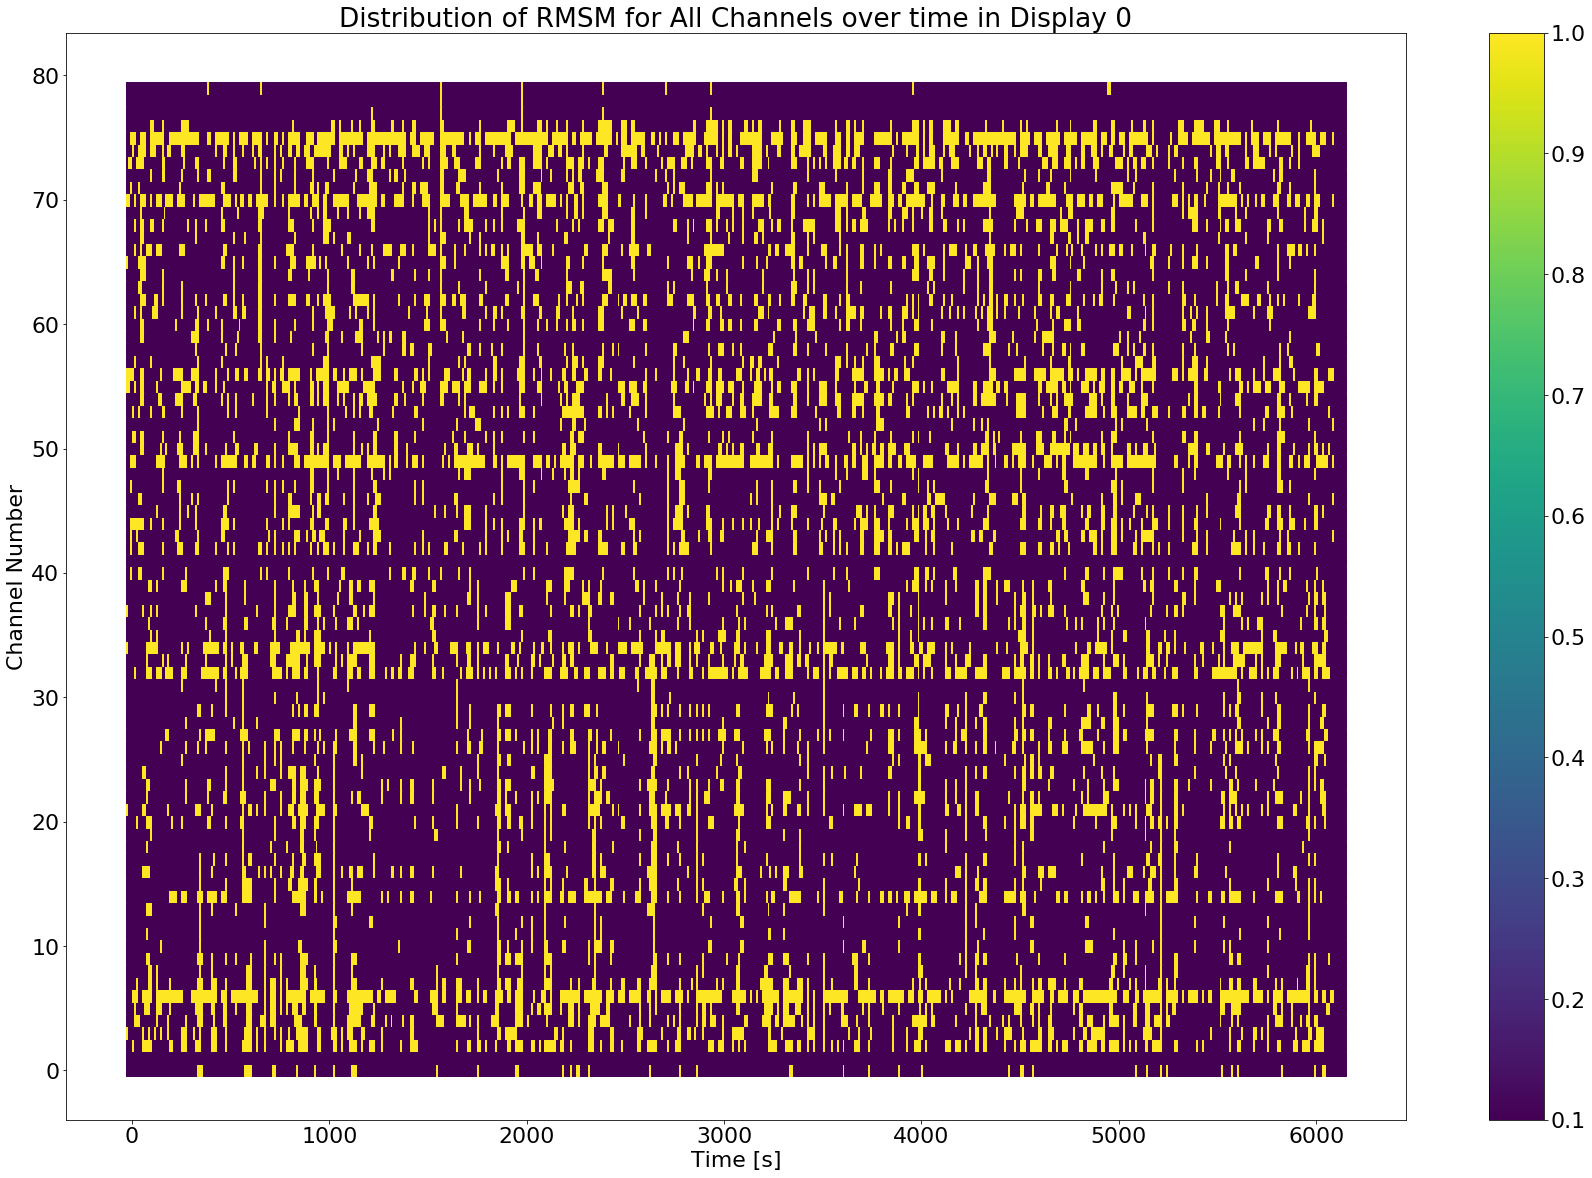

In [15]:
fig, ax = plt.subplots()
for i in range(faulty_0.shape[0]):
    sc=ax.scatter(time_0,channels_0[i,:], c=faulty_0[i,:],vmin=0.1, vmax=1,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0.1, vmax=1)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Faulty Pixels in Display 0")
plt.show()

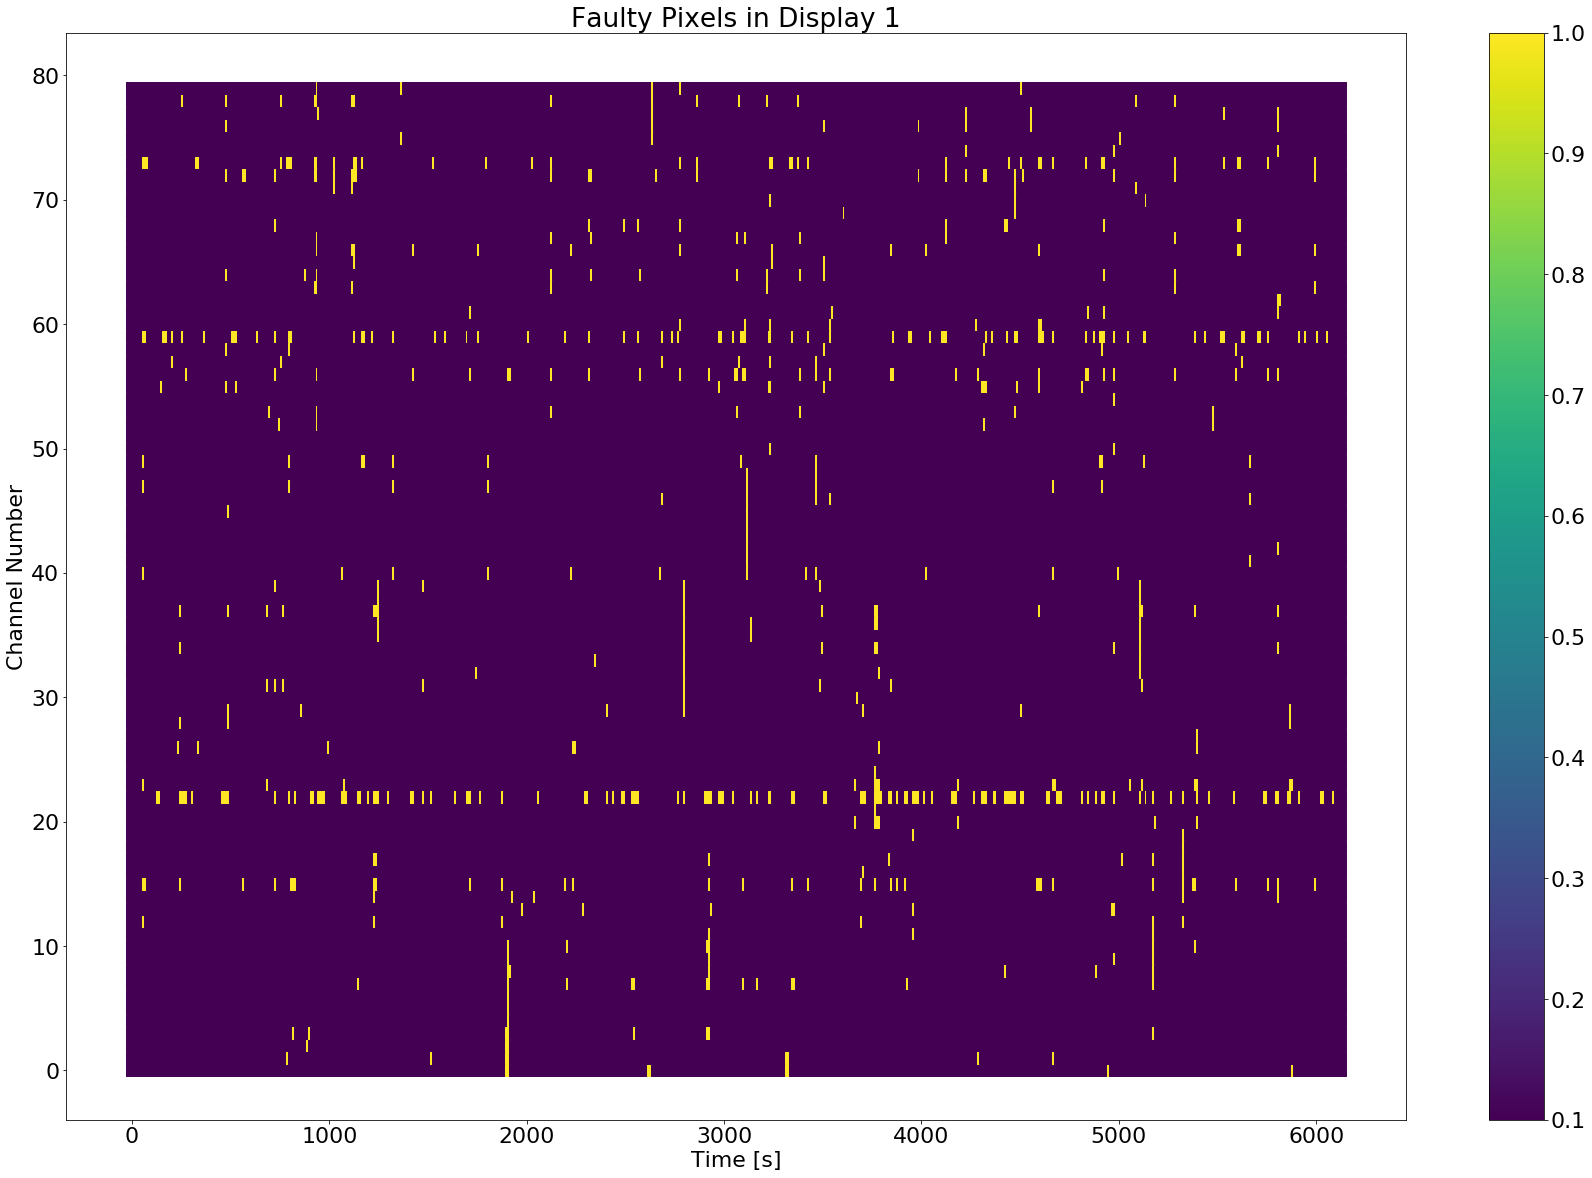

In [16]:
fig, ax = plt.subplots()
for i in range(faulty_1.shape[0]):
    sc=ax.scatter(time_1,channels_1[i,:], c=faulty_1[i,:],vmin=0.1, vmax=1,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0.1, vmax=1)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Faulty Pixels in Display 1")
plt.show()

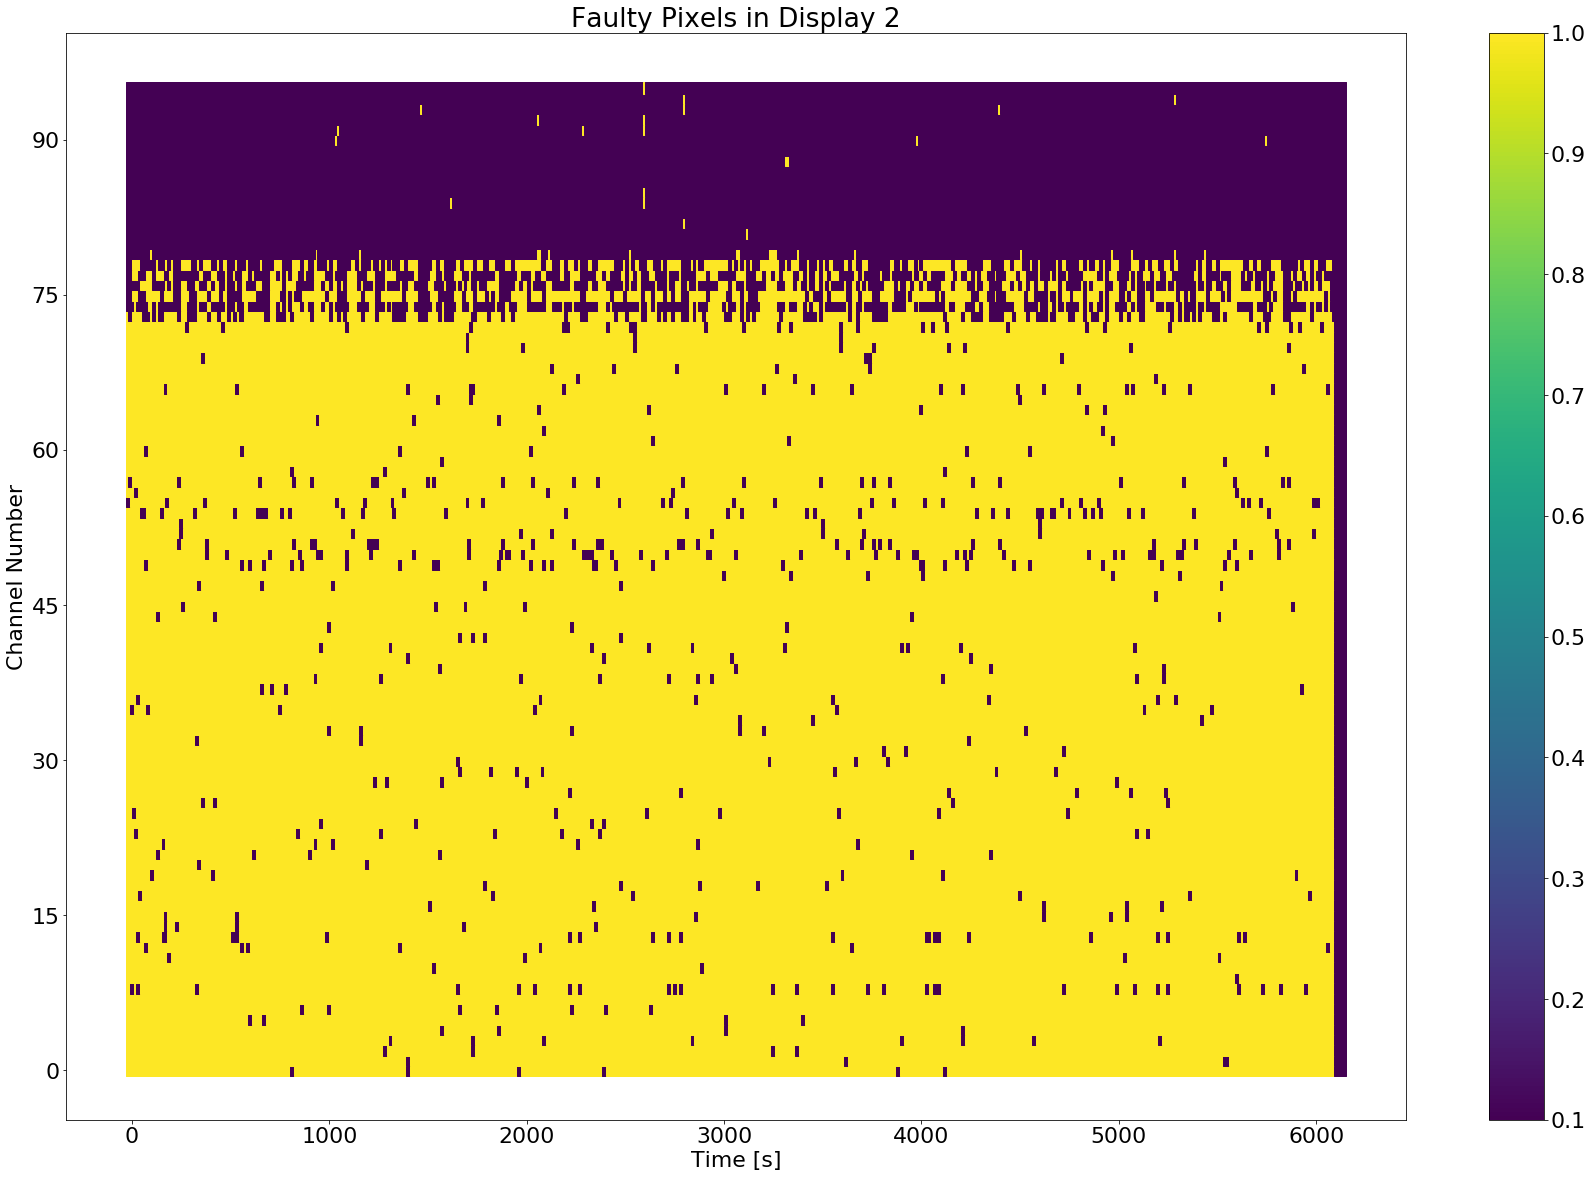

In [17]:
fig, ax = plt.subplots()
for i in range(faulty_2.shape[0]):
    sc=ax.scatter(time_2,channels_2[i,:], c=faulty_2[i,:],vmin=0.1, vmax=1,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0.1, vmax=1)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Faulty Pixels in Display 2")
plt.show()